In [3]:
import numpy as np
from continuous_utils import Distribution, generate_agents, sim, Agent, Tolerance
from generateOpinions import *
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

In [4]:
def load_agents(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

In [5]:
directory_path = 'saved_sim_runs'
files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]
print(files)
# Filter Files
files = [f for f in files if 'iterations' in f]
files.sort()

sim_agents_list = []
for file in files:
    sim_agents_list.append(load_agents(os.path.join(directory_path, file)))

['symmetric_bimodal_100_iterations.pkl', 'symmetric_bimodal_500_iterations.pkl', 'symmetric_bimodal_400_iterations.pkl', 'symmetric_bimodal_300_iterations.pkl', 'symmetric_bimodal_1000_iterations.pkl', 'symmetric_bimodal_800_iterations.pkl', 'symmetric_bimodal_700_iterations.pkl', 'symmetric_bimodal_200_iterations.pkl', 'symmetric_bimodal_900_iterations.pkl', 'symmetric_bimodal_600_iterations.pkl']


In [10]:
def sort_agents_by_opinion(agents):
    return sorted(agents.items(), key=lambda x: x[1].opinions[0])

Sim with 1000 iterations


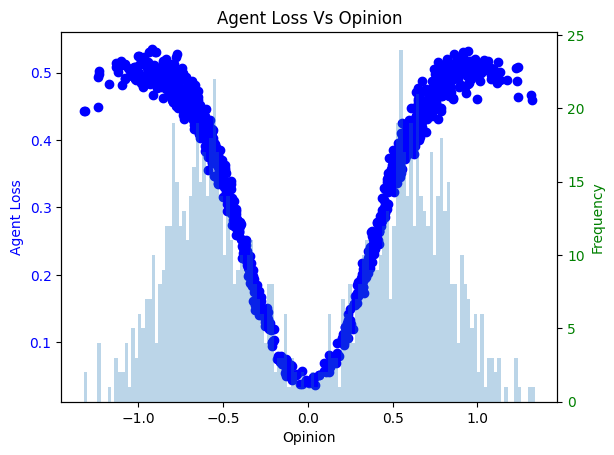

Sim with 100 iterations


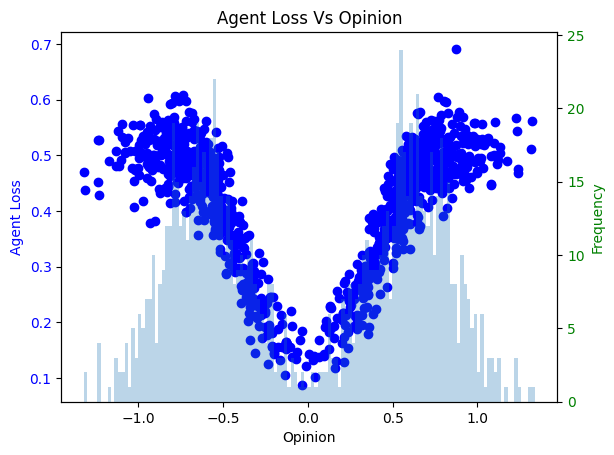

Sim with 200 iterations


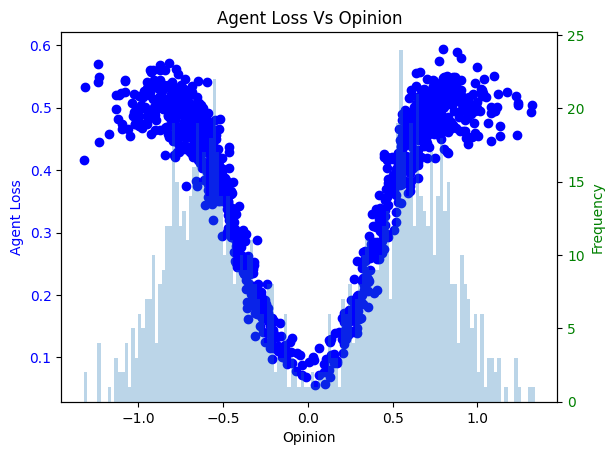

Sim with 300 iterations


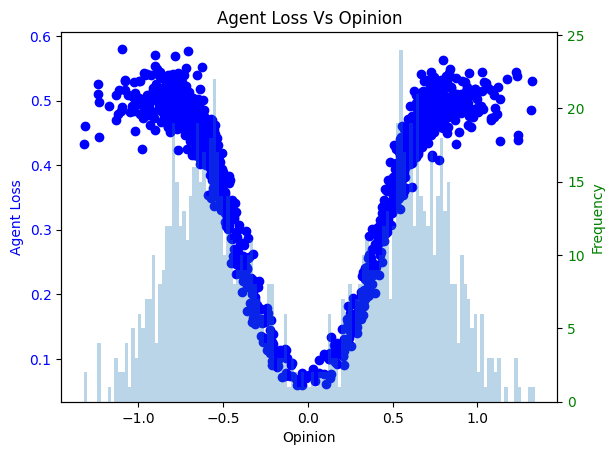

Sim with 400 iterations


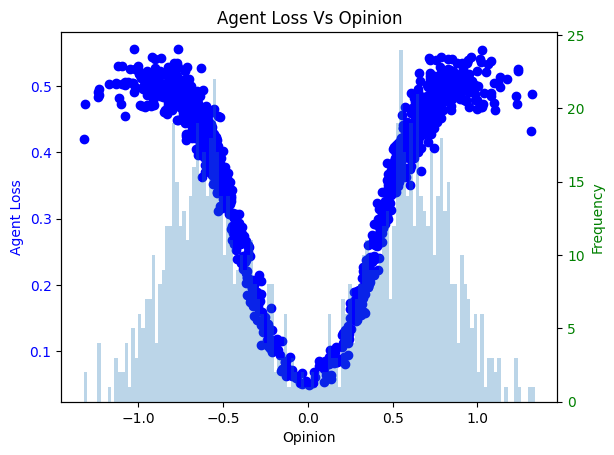

Sim with 500 iterations


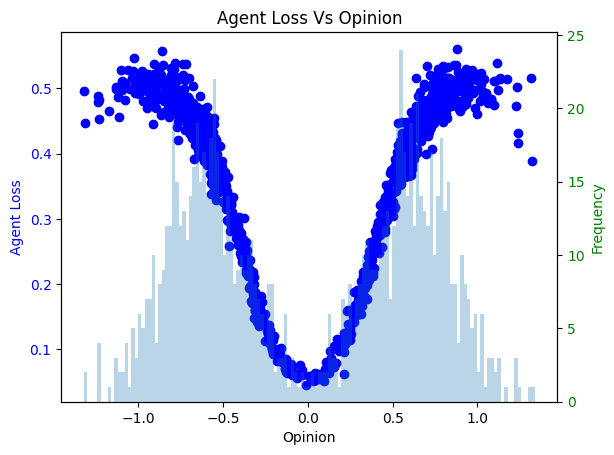

Sim with 600 iterations


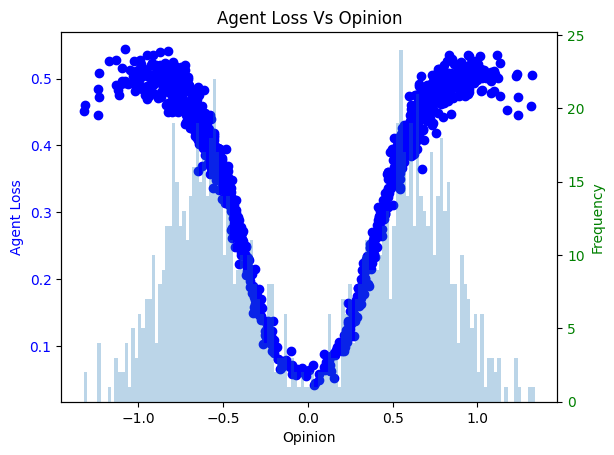

Sim with 700 iterations


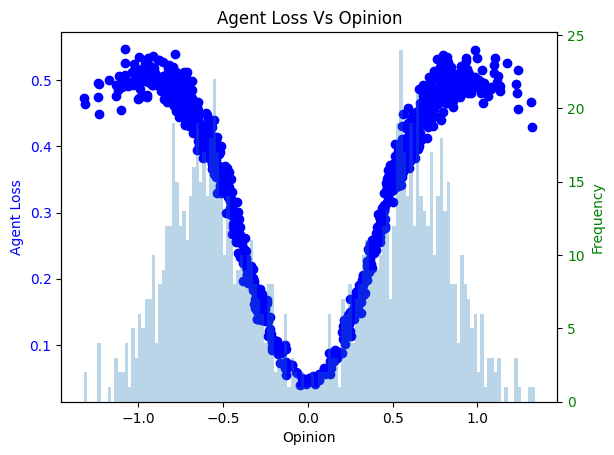

Sim with 800 iterations


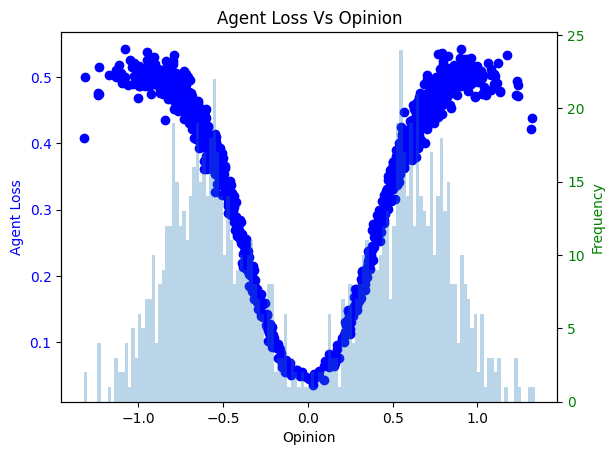

Sim with 900 iterations


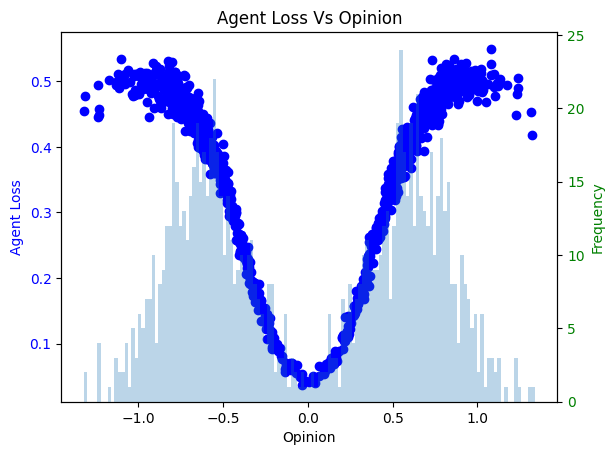

In [16]:
strat_to_threshold = {
        0: 0.01,
        1: 0.01,
        2: 0.95
    }

for agents in sim_agents_list:
    first_agent = list(agents.values())[0]
    iterations = len(first_agent.old_strategy_weights) - 1
    print(f"=================================")
    print(f"Sim with {iterations} iterations")
    print(f"=================================")
    for agent in agents.values():
        agent.update_agent_strat_prob_history()

    # Sort agents by their opinions
    sorted_agents = sort_agents_by_opinion(agents)

    # Assuming `sorted_agents` is a list of tuples and you have access to opinion and strategy probability data
    opinions = []
    losses = []

    # Collect data for each agent
    for uuid, agent in sorted_agents:
        opinions.append(agent.opinions[0])
        losses.append(agent.agent_loss / iterations)

    # Create a plot with two y-axes
    fig, ax1 = plt.subplots()

    # Scatter plot on primary y-axis
    ax1.scatter(opinions, losses, color='b')
    # Get range for which everyone is above the threshold
    # is_above_threshold = strat_to_threshold[strat] > 0.5
    # threshold_range = find_max_length_index_range(strat_prob, strat_to_threshold[strat], is_above_threshold)
    # if threshold_range:
    #     start_opinion = opinions[threshold_range[0]]
    #     end_opinion = opinions[threshold_range[1]]
    #     print(f"Stable Strategy Opinion Range: [{start_opinion}, {end_opinion}]")  # Printing for verification
    #     y_coord = -40 if is_above_threshold == True else -40
    #     ax1.axvspan(start_opinion, end_opinion, color='y', alpha=0.5)
    #     # ax1.annotate(f'Start: {start_opinion:.2f}', (start_opinion, strat_prob[threshold_range[0]]),
    #     #     xytext=(y_coord, 20), textcoords="offset points", ha='center', va='top', color='red')
    #     # ax1.annotate(f'End: {end_opinion:.2f}', (end_opinion, strat_prob[threshold_range[1]]),
    #     #     xytext=(-y_coord, 20), textcoords="offset points", ha='center', va='top', color='red')
    # stable_strat_opinion_ranges[f'stat_{strat}_iters_{iterations}'] = (start_opinion, end_opinion)

    # ax1.axvline(x=0, color='r', linestyle='--')  # 'r' for red, '--' for dashed line style

    ax1.set_xlabel('Opinion')
    ax1.set_ylabel(f'Agent Loss', color='b')
    
    # Create secondary y-axis for the histogram
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.hist(opinions, bins=np.arange(min(opinions), max(opinions) + 0.02, 0.02), alpha=0.3)
    ax2.set_ylabel('Frequency', color='g')

    # Change the tick color and label color to match the plots
    ax1.tick_params(axis='y', labelcolor='b')
    ax2.tick_params(axis='y', labelcolor='g')

    plt.title(f'Agent Loss Vs Opinion')
    plt.show()
